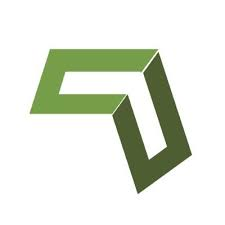

# Anomaly Detection Project
***

## Executive Summary
#### Overview

Presented with a set of questions regarding Code Up's cohorts' online traffic patterns for their use of class lessons and documentation, we are to explore the cohorts' web logs to discover answers to the questions given to us.  Using a SQL database and a .csv containing web logs and cohort data, we will be analyzing the data to find how the cohorts accessed the class lessons online.  

#### Project Goals
- Explore, visualize, and analyze data to discover answers to the questions given to us.
- Create an email in response to the request included below containing findings. 
- Create a single Executive Summary-like slide summarizing most important findings
- Create a Jupyter Notebook outlining work done to answer questions
- Answer at least 5 of the 8 questions asked in the request including:
    - 1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?
    - 2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?
    - 3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?
    - 4.  Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?
    - 5.  At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?
    - 6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?
    - 7.  Which lessons are least accessed?
    - 8.  Anything else I should be aware of?




#### Outline of Process

The plan for this project is to do the following:
- Acquire cohort schedule info from SQL database and join with cohorts.csv sent to us. 
- Prepare data by dropping columns, renaming columns, handling null values and creating new columns.
- Explore data by visualizing and analyzing data.
- Create questions based off questions sent to us and explore data for answers.
- Come up with conclusions and gather and notate findings.
- Create email and Google Slide with responses to questions and key findings

#### Conclusion & Key Findings




*** 
Project Scenario from Google Assignment

Hello,

I have some questions for you that I need to be answered before the board meeting Friday afternoon. I need to be able to speak to the following questions. I also need a single slide that I can incorporate into my existing presentation (Google Slides) that summarizes the most important points. My questions are listed below; however, if you discover anything else important that I didn’t think to ask, please include that as well.


1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?
2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?
3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?
4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?
5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?
6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?
7. Which lessons are least accessed?
8. Anything else I should be aware of?


Thank you

***

Other info:

* To turn in your project, email datascience@codeup.com with the subject line "Anomaly Detection Project"
-  To get 100 on this project you only need to answer 5 out of the 7 questions (along with the other deliverables listed below i.e. slide, your notebook, etc).
-  Submit a link to a final notebook on GitHub that asks and answers questions - document the work you do to justify findings
-  Compose an email with the answers to the questions/your findings, and in the email, include the link to your notebook in GitHub and attach your slide.
-  You will not present this, so be sure that the details you need your leader to convey/understand are clearly communicated in the email.
-  Your slide should be like an executive summary and be in form to present.
-  Continue to use best practices of acquire.py, prepare.py, etc.
-  Since there is no modeling to be done for this project, there is no need to split the data into train/validate/test
-  The cohort schedule is in the SQL database, and alumni.codeup.com has info as well.

# Acquire

We were given a .csv file containing cohorts data.  Will read that into a dataframe to explore.

In [1]:
#Disable warnings
import warnings
warnings.filterwarnings('ignore')

#Import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scaler import
from sklearn.preprocessing import MinMaxScaler

# DBSCAN import
from sklearn.cluster import DBSCAN

#Import custom libraries
import acquire
import prepare

In [2]:
df_csv = pd.read_csv('cohorts.csv')

In [3]:
df_csv.head()

,cohort_id,name,start_date,end_date,program_id
0,1,Arches,2014-02-04,2014-04-22,1
1,2,Badlands,2014-06-04,2014-08-22,1
2,3,Carlsbad,2014-09-04,2014-11-05,1
3,4,Denali,2014-10-20,2015-01-18,1
4,5,Everglades,2014-11-18,2015-02-24,1


In [4]:
df_csv.shape

(46, 5)

In [5]:
df_csv.info

<bound method DataFrame.info of     cohort_id        name  start_date    end_date  program_id
0           1      Arches  2014-02-04  2014-04-22           1
1           2    Badlands  2014-06-04  2014-08-22           1
2           3    Carlsbad  2014-09-04  2014-11-05           1
3           4      Denali  2014-10-20  2015-01-18           1
4           5  Everglades  2014-11-18  2015-02-24           1
5           6    Franklin  2015-02-03  2015-05-26           1
6           7     Glacier  2015-06-05  2015-10-06           1
7           8     Hampton  2015-09-22  2016-02-06           1
8           9      Apollo  2015-03-30  2015-07-29           4
9          10      Balboa  2015-11-03  2016-03-11           4
10         11         Ike  2016-01-20  2016-05-12           1
11         12      Joshua  2016-03-08  2016-06-30           1
12         13       Kings  2016-05-23  2016-09-15           1
13         14      Lassen  2016-07-18  2016-11-10           1
14         15     Mammoth  2016-09-26 

- It looks like we have the Code Up cohorts names, dates started and date ended.

We will acquire data from the curriculum logs DB using SQL queries and our acquire.py

In [6]:
df = acquire.get_cohort_log_data()

In [7]:
df.head()

,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id,date,time,path,user_id,cohort_id,ip
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-04-21,12:36:54,toc,717,NaN,136.50.102.126
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-04-21,12:36:59,javascript-i/introduction/primitive-types,717,NaN,136.50.102.126
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-04-21,12:37:31,javascript-i/introduction/operators,717,NaN,136.50.102.126
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-04-21,12:38:25,javascript-i/introduction/variables,717,NaN,136.50.102.126
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-04-21,12:38:43,javascript-i/introduction/working-with-data-ty...,717,NaN,136.50.102.126


In [8]:
df.shape

(900223, 15)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 900223 entries, 0 to 900222
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          847330 non-null  float64
 1   name        847330 non-null  object 
 2   slack       847330 non-null  object 
 3   start_date  847330 non-null  object 
 4   end_date    847330 non-null  object 
 5   created_at  847330 non-null  object 
 6   updated_at  847330 non-null  object 
 7   deleted_at  0 non-null       float64
 8   program_id  847330 non-null  float64
 9   date        900223 non-null  object 
 10  time        900223 non-null  object 
 11  path        900222 non-null  object 
 12  user_id     900223 non-null  int64  
 13  cohort_id   847330 non-null  float64
 14  ip          900223 non-null  object 
dtypes: float64(4), int64(1), object(10)
memory usage: 109.9+ MB


In [10]:
df.tail()

,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id,date,time,path,user_id,cohort_id,ip
900218,139.0,Oberon,#oberon,2021-04-12,2021-10-01,2021-04-12 18:07:21,2021-04-12 18:07:21,NaN,2.0,2021-04-21,12:13:18,javascript-i/testing-user-functions,969,139.0,107.77.169.64
900219,139.0,Oberon,#oberon,2021-04-12,2021-10-01,2021-04-12 18:07:21,2021-04-12 18:07:21,NaN,2.0,2021-04-21,12:31:48,javascript-i,969,139.0,107.77.169.64
900220,139.0,Oberon,#oberon,2021-04-12,2021-10-01,2021-04-12 18:07:21,2021-04-12 18:07:21,NaN,2.0,2021-04-21,12:31:58,javascript-i/javascript-with-html,969,139.0,107.77.169.64
900221,139.0,Oberon,#oberon,2021-04-12,2021-10-01,2021-04-12 18:07:21,2021-04-12 18:07:21,NaN,2.0,2021-04-21,12:32:01,javascript-i/testing-user-functions,969,139.0,107.77.169.64
900222,139.0,Oberon,#oberon,2021-04-12,2021-10-01,2021-04-12 18:07:21,2021-04-12 18:07:21,NaN,2.0,2021-04-21,13:14:10,/,970,139.0,172.56.14.200


- Our dataframe returns the data from the curriculum logs for all cohorts at Code Up.

## Prepare

Now that we've acquired our data, let's look for nulls.

In [11]:
df.isna().sum()

id             52893
name           52893
slack          52893
start_date     52893
end_date       52893
created_at     52893
updated_at     52893
deleted_at    900223
program_id     52893
date               0
time               0
path               1
user_id            0
cohort_id      52893
ip                 0
dtype: int64

In [12]:
acquire.nulls_by_col(df)

,num_rows_missing,percent_rows_missing
id,52893,5.875544
name,52893,5.875544
slack,52893,5.875544
start_date,52893,5.875544
end_date,52893,5.875544
created_at,52893,5.875544
updated_at,52893,5.875544
deleted_at,900223,100.000000
program_id,52893,5.875544
date,0,0.000000


In [13]:
acquire.nulls_by_row(df)

,num_cols_missing,percent_cols_missing,index
0,1,6.666666666666667,847329
1,2,13.333333333333334,1
2,10,66.66666666666666,52893


In [14]:
df[df.name.isna() & df.program_id.isna()]

,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id,date,time,path,user_id,cohort_id,ip
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-04-21,12:36:54,toc,717,NaN,136.50.102.126
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-04-21,12:36:59,javascript-i/introduction/primitive-types,717,NaN,136.50.102.126
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-04-21,12:37:31,javascript-i/introduction/operators,717,NaN,136.50.102.126
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-04-21,12:38:25,javascript-i/introduction/variables,717,NaN,136.50.102.126
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-04-21,12:38:43,javascript-i/introduction/working-with-data-ty...,717,NaN,136.50.102.126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52888,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-08-08,10:19:19,java-ii/inheritance-and-polymorphism,48,NaN,216.177.189.26
52889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-08-08,10:19:20,java-ii/interfaces-and-abstract-classes,48,NaN,216.177.189.26
52890,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-08-08,15:29:32,/,362,NaN,70.123.200.145
52891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-08-09,08:01:30,/,367,NaN,216.180.182.238


#### Deciding to drop nulls since they do not have a cohort associated to them and eliminates much of the earlier data during curriculum and cohort establishment making for a cleaner data frame.  Will look into nulls later. Will add code to drop nulls in prepare.py.

In [15]:
df = prepare.prepare_data()
df.head()

,id,name,slack,start_date,end_date,created_at,updated_at,program_id,date,time,path,user_id,cohort_id,ip,program_type
2019-06-01 17:31:28,1.0,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,2019-06-01,2021-10-21 17:31:28,java-i,402,1.0,71.78.236.131,php
2019-06-01 17:31:35,1.0,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,2019-06-01,2021-10-21 17:31:35,java-i/syntax-types-and-variables,402,1.0,71.78.236.131,php
2019-06-01 17:31:40,1.0,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,2019-06-01,2021-10-21 17:31:40,html-css,402,1.0,71.78.236.131,php
2019-06-01 17:56:01,1.0,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,2019-06-01,2021-10-21 17:56:01,html-css/elements,402,1.0,71.78.236.131,php
2019-06-01 18:06:35,1.0,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,2019-06-01,2021-10-21 18:06:35,html-css/elements,402,1.0,71.78.236.131,php


In [16]:
#Checking to see that nulls were dropped
df.isna().sum()

id              0
name            0
slack           0
start_date      0
end_date        0
created_at      0
updated_at      0
program_id      0
date            0
time            0
path            0
user_id         0
cohort_id       0
ip              0
program_type    0
dtype: int64

- Nulls have been removed

In [17]:
#Look at prepped dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 764015 entries, 2019-06-01 17:31:28 to 2021-04-21 12:32:01
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            764015 non-null  float64       
 1   name          764015 non-null  object        
 2   slack         764015 non-null  object        
 3   start_date    764015 non-null  datetime64[ns]
 4   end_date      764015 non-null  datetime64[ns]
 5   created_at    764015 non-null  datetime64[ns]
 6   updated_at    764015 non-null  datetime64[ns]
 7   program_id    764015 non-null  float64       
 8   date          764015 non-null  datetime64[ns]
 9   time          764015 non-null  datetime64[ns]
 10  path          764015 non-null  object        
 11  user_id       764015 non-null  int64         
 12  cohort_id     764015 non-null  float64       
 13  ip            764015 non-null  object        
 14  program_type  764015 non-null  obj

In [18]:
df.columns

Index(['id', 'name', 'slack', 'start_date', 'end_date', 'created_at',
       'updated_at', 'program_id', 'date', 'time', 'path', 'user_id',
       'cohort_id', 'ip', 'program_type'],
      dtype='object')

In [19]:
#Look at the different counts per each program ID
df.program_id.value_counts()

2.0    656931
3.0     79612
1.0     27469
4.0         3
Name: program_id, dtype: int64

In [20]:
#Look at the distribution of web logs by program type
df.program_type.value_counts()

java            656931
data_science     79612
php              27469
front_end            3
Name: program_type, dtype: int64

<AxesSubplot:>

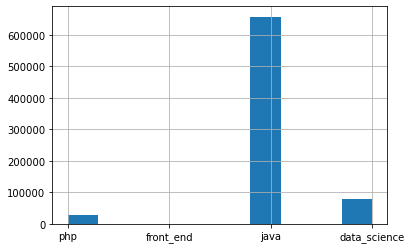

In [21]:
df.program_type.hist()

In [22]:
df.path.value_counts()

javascript-i                                                     18203
toc                                                              17591
java-iii                                                         13166
html-css                                                         13127
java-ii                                                          12177
                                                                 ...  
one                                                                  1
slides/formmodelbinding                                              1
appendix/open_data/www.flickr.com/services/api                       1
interview                                                            1
10-anomaly-detection/2-continuous-probabilistic-methods.ipynb        1
Name: path, Length: 2093, dtype: int64

- Created a new column with description of program type for easier readability
- We have 52,893 nulls, and dropped them in our prepare.py
- Dropped 'deleted_at' column because no entries have a value, all are null, which means no web logs have been deleted
- Removed log entries for paths ending in image or json files

## Explore

Let's dig into the data and see what we find!

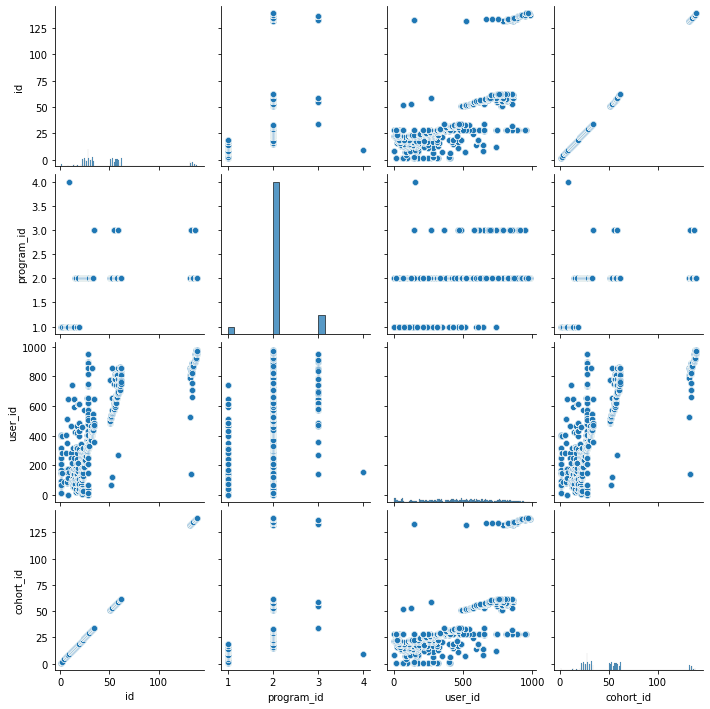

In [23]:
#Create a pair plot to see visual relationships between numeric variables
sns.pairplot(df)

In [24]:
#Combine date and time columns into one date-time column to use for indexing
#df = df.set_index(pd.to_datetime(df.date + ' ' + df.time))

<AxesSubplot:title={'center':'Which hours were the most active?'}>

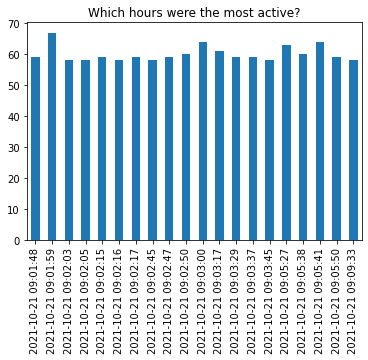

In [25]:
df.time.value_counts().head(20).sort_index().plot.bar(title='Which hours were the most active?')

<AxesSubplot:title={'center':'Which date/times were the most active?'}>

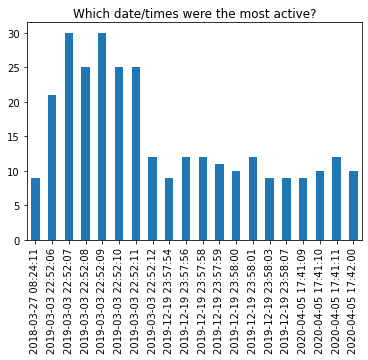

In [26]:
df.index.value_counts().head(20).sort_index().plot.bar(title='Which date/times were the most active?')

<AxesSubplot:title={'center':'Which program types are the most popular?'}>

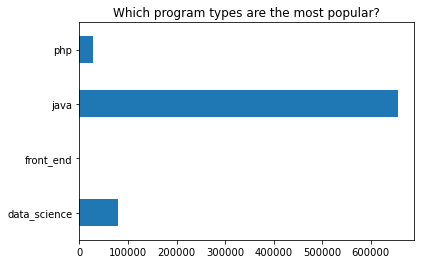

In [27]:
df.program_type.value_counts().sort_index().plot.barh(title="Which program types are the most popular?")

<AxesSubplot:title={'center':'Which cohorts are the most active online?'}>

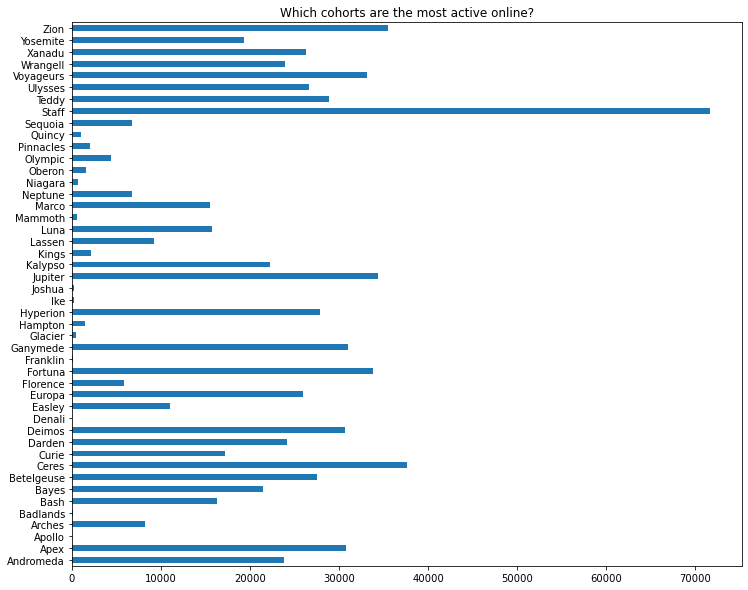

In [28]:
fig, ax = plt.subplots(figsize=(12,10))
df.name.value_counts().sort_index().plot.barh(title="Which cohorts are the most active online?")

- After Code Up staff, Ceres was the most frequest accessor of the curriculum.

In [29]:
# Daily counts for number of page views

pages = df['path'].resample('d').count()
pages.head()

2018-01-26    489
2018-01-27    202
2018-01-28    142
2018-01-29    715
2018-01-30    566
Freq: D, Name: path, dtype: int64

<AxesSubplot:>

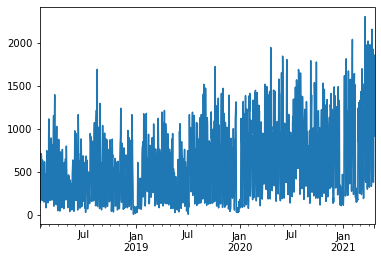

In [30]:
#plot pages
pages.plot()

### Questions

<code style="background:skyblue;color:black">1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?</code>

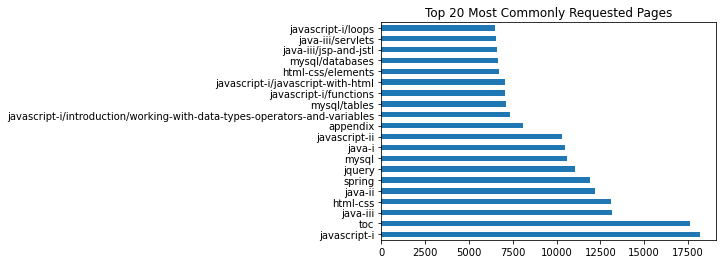

In [31]:
df.path.value_counts().head(20).plot.barh(
    title='Top 20 Most Commonly Requested Pages');

In [32]:
def value_counts_and_frequencies(s: pd.Series, dropna=True) -> pd.DataFrame:
    return pd.merge(
        s.value_counts(dropna=False).rename('count'),
        s.value_counts(dropna=False, normalize=True).rename('proba'),
        left_index=True,
        right_index=True,
    )

In [33]:
#Look at the top lessons accessed
path_df = value_counts_and_frequencies(df.path)
path_df.head(10)

,count,proba
javascript-i,18203,0.023825
toc,17591,0.023024
java-iii,13166,0.017233
html-css,13127,0.017182
java-ii,12177,0.015938
spring,11883,0.015553
jquery,11041,0.014451
mysql,10611,0.013888
java-i,10467,0.013700
javascript-ii,10294,0.013474


In [34]:
#Look at the 20 lessons least accessed
path_df.tail(20)

,count,proba
javascript-i/primitive-types,1,0.000001
capstone/team,1,0.000001
8-timeseries/3-acquire,1,0.000001
appendix/intellij-intro,1,0.000001
appendix/offer-letters,1,0.000001
prework/fundamentals/function,1,0.000001
javascript-i/bom-and-dom/bom/google.com,1,0.000001
appendix/cli/more-topics,1,0.000001
app,1,0.000001
decision-trees,1,0.000001


- The javascript - i lesson looks to be the most commonly requested page



<code style="background:skyblue;color:black">2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?</code>

- Will group by program type to compare cohorts and then look at the max lessons viewed and how they compared to other cohorts. 

In [35]:
#Let's take a look at user lesson counts
lesson_counts_by_cohort = df.groupby(['name'])['date','name','path'].nunique()
lesson_counts_by_cohort

,date,name,path
name,,,
Andromeda,430,1,334
Apex,381,1,271
Apollo,1,1,2
Arches,272,1,317
Badlands,11,1,42
Bash,251,1,273
Bayes,491,1,489
Betelgeuse,415,1,310
Ceres,461,1,288


In [ ]:
#Let's take a look at user lesson counts by path
lesson_counts_by_path = df.groupby(['path'])['date','name'].nunique()
lesson_counts_by_path.max()

In [37]:
#Create an initial lesson category to group paths by
df['module_1'] = df.path.str.split('/').str[0]
df['module_2'] = df.path.str.split('/').str[1]
df.head()

,id,name,slack,start_date,end_date,created_at,updated_at,program_id,date,time,path,user_id,cohort_id,ip,program_type,module_1,module_2
2019-06-01 17:31:28,1.0,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,2019-06-01,2021-10-21 17:31:28,java-i,402,1.0,71.78.236.131,php,java-i,NaN
2019-06-01 17:31:35,1.0,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,2019-06-01,2021-10-21 17:31:35,java-i/syntax-types-and-variables,402,1.0,71.78.236.131,php,java-i,syntax-types-and-variables
2019-06-01 17:31:40,1.0,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,2019-06-01,2021-10-21 17:31:40,html-css,402,1.0,71.78.236.131,php,html-css,NaN
2019-06-01 17:56:01,1.0,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,2019-06-01,2021-10-21 17:56:01,html-css/elements,402,1.0,71.78.236.131,php,html-css,elements
2019-06-01 18:06:35,1.0,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,2019-06-01,2021-10-21 18:06:35,html-css/elements,402,1.0,71.78.236.131,php,html-css,elements


In [38]:
# Let's create a subset of data science students to compare lessons by cohort
ds_cohorts = df[(df['program_type'] == 'data_science')  & (df['name'] != 'staff')]
ds_cohorts

,id,name,slack,start_date,end_date,created_at,updated_at,program_id,date,time,path,user_id,cohort_id,ip,program_type,module_1,module_2
2021-01-27 14:03:03,34.0,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,3.0,2021-01-27,2021-10-21 14:03:03,python/data-types-and-variables,478,34.0,67.11.138.10,data_science,python,data-types-and-variables
2021-01-28 08:17:27,34.0,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,3.0,2021-01-28,2021-10-21 08:17:27,appendix/postwork,474,34.0,50.206.173.154,data_science,appendix,postwork
2021-01-28 08:17:50,34.0,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,3.0,2021-01-28,2021-10-21 08:17:50,appendix/interview_questions_students,474,34.0,50.206.173.154,data_science,appendix,interview_questions_students
2021-01-28 10:11:10,34.0,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,3.0,2021-01-28,2021-10-21 10:11:10,appendix/interview_questions_students,474,34.0,50.206.173.154,data_science,appendix,interview_questions_students
2021-01-28 10:37:44,34.0,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,3.0,2021-01-28,2021-10-21 10:37:44,clustering/explore,485,34.0,173.174.142.84,data_science,clustering,explore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-08 13:57:08,137.0,Florence,#florence,2021-03-15,2021-09-03,2021-03-15 18:18:20,2021-03-15 18:18:20,3.0,2021-04-08,2021-10-21 13:57:08,python/control-structures,905,137.0,66.69.44.254,data_science,python,control-structures
2021-04-08 13:59:05,137.0,Florence,#florence,2021-03-15,2021-09-03,2021-03-15 18:18:20,2021-03-15 18:18:20,3.0,2021-04-08,2021-10-21 13:59:05,python/control-structures,949,137.0,136.49.16.164,data_science,python,control-structures
2021-04-08 14:01:22,137.0,Florence,#florence,2021-03-15,2021-09-03,2021-03-15 18:18:20,2021-03-15 18:18:20,3.0,2021-04-08,2021-10-21 14:01:22,python/data-types-and-variables,949,137.0,136.49.16.164,data_science,python,data-types-and-variables
2021-04-08 14:04:14,137.0,Florence,#florence,2021-03-15,2021-09-03,2021-03-15 18:18:20,2021-03-15 18:18:20,3.0,2021-04-08,2021-10-21 14:04:14,python/control-structures,912,137.0,67.11.147.201,data_science,python,control-structures


In [39]:
# Let's create a subset of Java students to compare lessons by cohort
java_cohorts = df[(df['program_type'] == 'java') & (df['name'] != 'staff') ]  
java_cohorts

,id,name,slack,start_date,end_date,created_at,updated_at,program_id,date,time,path,user_id,cohort_id,ip,program_type,module_1,module_2
2018-09-06 17:01:42,15.0,Mammoth,#mammoth,2016-09-26,2017-02-02,2016-09-26 15:58:53,2016-09-26 15:58:53,2.0,2018-09-06,2021-10-21 17:01:42,javascript-i/objects/math,72,15.0,70.123.215.59,java,javascript-i,objects
2018-09-06 17:01:48,15.0,Mammoth,#mammoth,2016-09-26,2017-02-02,2016-09-26 15:58:53,2016-09-26 15:58:53,2.0,2018-09-06,2021-10-21 17:01:48,javascript-i/bom-and-dom,72,15.0,70.123.215.59,java,javascript-i,bom-and-dom
2018-09-06 17:01:50,15.0,Mammoth,#mammoth,2016-09-26,2017-02-02,2016-09-26 15:58:53,2016-09-26 15:58:53,2.0,2018-09-06,2021-10-21 17:01:50,javascript-i/bom-and-dom/bom,72,15.0,70.123.215.59,java,javascript-i,bom-and-dom
2018-09-06 18:12:14,15.0,Mammoth,#mammoth,2016-09-26,2017-02-02,2016-09-26 15:58:53,2016-09-26 15:58:53,2.0,2018-09-06,2021-10-21 18:12:14,javascript-i/bom-and-dom/dom,72,15.0,70.123.215.59,java,javascript-i,bom-and-dom
2018-09-06 18:12:38,15.0,Mammoth,#mammoth,2016-09-26,2017-02-02,2016-09-26 15:58:53,2016-09-26 15:58:53,2.0,2018-09-06,2021-10-21 18:12:38,javascript-i/bom-and-dom/dom-events,72,15.0,70.123.215.59,java,javascript-i,bom-and-dom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-21 12:13:13,139.0,Oberon,#oberon,2021-04-12,2021-10-01,2021-04-12 18:07:21,2021-04-12 18:07:21,2.0,2021-04-21,2021-10-21 12:13:13,javascript-i,969,139.0,107.77.169.64,java,javascript-i,NaN
2021-04-21 12:13:18,139.0,Oberon,#oberon,2021-04-12,2021-10-01,2021-04-12 18:07:21,2021-04-12 18:07:21,2.0,2021-04-21,2021-10-21 12:13:18,javascript-i/testing-user-functions,969,139.0,107.77.169.64,java,javascript-i,testing-user-functions
2021-04-21 12:31:48,139.0,Oberon,#oberon,2021-04-12,2021-10-01,2021-04-12 18:07:21,2021-04-12 18:07:21,2.0,2021-04-21,2021-10-21 12:31:48,javascript-i,969,139.0,107.77.169.64,java,javascript-i,NaN
2021-04-21 12:31:58,139.0,Oberon,#oberon,2021-04-12,2021-10-01,2021-04-12 18:07:21,2021-04-12 18:07:21,2.0,2021-04-21,2021-10-21 12:31:58,javascript-i/javascript-with-html,969,139.0,107.77.169.64,java,javascript-i,javascript-with-html


In [40]:
ds_lesson_counts_by_path = ds_cohorts.groupby(['name'])['module_1','path'].nunique()
ds_lesson_counts_by_path

,module_1,path
name,,
Bayes,72,489
Curie,51,386
Darden,66,386
Easley,34,209
Florence,35,141


<AxesSubplot:ylabel='name'>

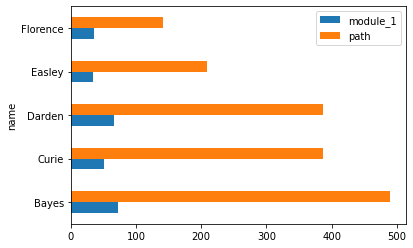

In [41]:
ds_lesson_counts_by_path.plot.barh()

- It looks like Bayes had the most frequent access to the curriculum of all data science cohorts

In [42]:
ds_lesson_counts_by_mod = ds_cohorts.groupby(['module_1'])['name','path'].nunique()
ds_lesson_counts_by_mod

,name,path
module_1,,
%20https:,1,1
",%20https:",1,1
1-fundamentals,5,14
1-overview,1,1
1.2-data-science-pipeline,1,1
...,...,...
user-defined-functions.md,1,1
viz.py,1,1
vocabulary,2,1


In [43]:
ds_cohorts.module_1.value_counts()

sql                            7505
classification                 6458
3-sql                          6165
python                         5599
fundamentals                   5015
                               ... 
itc%20-%20ml                      1
5-detecting-with-clustering       1
creating-charts                   1
decision-trees                    1
stats-assessment                  1
Name: module_1, Length: 135, dtype: int64

<AxesSubplot:ylabel='module_1'>

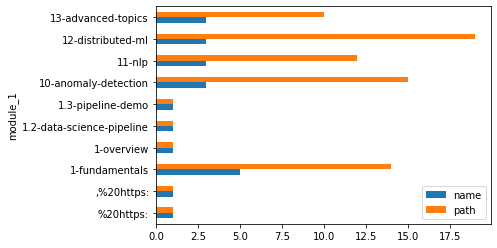

In [87]:
ds_lesson_counts_by_mod.head(10).plot.barh()


- Distributed Machine Learning was the most popular module followed by anomaly detection and then fundamentals.

In [ ]:
# plot data
fig, ax = plt.subplots(figsize=(15,10))
# use unstack()
ds_cohorts.groupby(['name','path']).count().unstack().head(10).plot.barh(ax=ax)
ax.legend().set_visible(False)

In [114]:
ds = ds_cohorts.groupby(['name','module_1']).count().unstack()
ds

id                                       \
module_1 %20https: ,%20https: 1-fundamentals 1-overview   
name                                                      
Bayes          NaN        NaN         1596.0        2.0   
Curie          1.0        1.0         1068.0        NaN   
Darden         NaN        NaN         1174.0        NaN   
Easley         NaN        NaN           62.0        NaN   
Florence       NaN        NaN           64.0        NaN   

                                                                           \
module_1 1.2-data-science-pipeline 1.3-pipeline-demo 10-anomaly-detection   
name                                                                        
Bayes                          NaN               NaN                813.0   
Curie                          NaN               NaN                583.0   
Darden                         5.0               4.0                 35.0   
Easley                         NaN               NaN                  NaN   
Florence                       NaN               NaN                  NaN   

                                                       ...   module_2  \
module_1  11-nlp 12-distributed-ml 13-advanced-topics  ... subqueries   
name                                                   ...              
Bayes     1118.0             512.0              604.0  ...        NaN   
Curie      735.0             305.0              404.0  ...        NaN   
Darden      12.0               1.0                3.0  ...        NaN   
Easley       NaN               NaN                NaN  ...        NaN   
Florence     NaN               NaN                NaN  ...        0.0   

                                                                         \
module_1 tidy-data timeseries  toc understand user-defined-functions.md   
name                                                                      
Bayes          0.0       78.0  0.0        NaN                       NaN   
Curie          NaN      133.0  NaN        NaN                       NaN   
Darden         NaN      938.0  0.0        NaN                       NaN   
Easley         NaN      435.0  NaN        0.0                       0.0   
Florence       NaN        6.0  NaN        NaN                       NaN   

                                                                
module_1 viz.py vocabulary where working-with-time-series-data  
name                                                            
Bayes       0.0        NaN   NaN                           NaN  
Curie       NaN        NaN   NaN                           NaN  
Darden      NaN        NaN   NaN                           0.0  
Easley      NaN        0.0   NaN                           NaN  
Florence    NaN        0.0   0.0                           NaN  

[5 rows x 2025 columns]

- For Bayes and Darden, the Fundamentals curriculum was acccesed more frequently than Easly and Florence
- The NLP was a popular topic for Baryes, but not so much for Darden
- Time Series was popular with Darden but not so much for Florence and Bayes

<code style="background:skyblue;color:black"> 3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?</code>

- I will need to check students' start and end date and see how often they referenced the curriculum

In [47]:
#Create a new column 'is_active' to check against for entries while student was active in the program
df['is_active'] = np.where(((df['date'] > df['start_date']) & (df['date'] < df['end_date'])), 1, 0)

In [48]:
df.head()

,id,name,slack,start_date,end_date,created_at,updated_at,program_id,date,time,path,user_id,cohort_id,ip,program_type,module_1,module_2,is_active
2019-06-01 17:31:28,1.0,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,2019-06-01,2021-10-21 17:31:28,java-i,402,1.0,71.78.236.131,php,java-i,NaN,0
2019-06-01 17:31:35,1.0,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,2019-06-01,2021-10-21 17:31:35,java-i/syntax-types-and-variables,402,1.0,71.78.236.131,php,java-i,syntax-types-and-variables,0
2019-06-01 17:31:40,1.0,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,2019-06-01,2021-10-21 17:31:40,html-css,402,1.0,71.78.236.131,php,html-css,NaN,0
2019-06-01 17:56:01,1.0,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,2019-06-01,2021-10-21 17:56:01,html-css/elements,402,1.0,71.78.236.131,php,html-css,elements,0
2019-06-01 18:06:35,1.0,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,2019-06-01,2021-10-21 18:06:35,html-css/elements,402,1.0,71.78.236.131,php,html-css,elements,0


- Use Conditional Probabilities to find user ids for active students accessing the curriculum the least

In [49]:
#Let's look at user ids that are active status
status_given_user_id = (
    df.groupby('is_active')
    .user_id.value_counts(normalize=True)
    .rename('proba_status_given_user_id')
    .reset_index()
)
status_given_user_id.head()

,is_active,user_id,proba_status_given_user_id
0,0,64,0.085191
1,0,11,0.077927
2,0,53,0.069942
3,0,314,0.041934
4,0,1,0.033765


In [50]:
#Look at the 10 user ids for active students to who least accessed the curriculum
status_given_user_id.tail(10)

,is_active,user_id,proba_status_given_user_id
1438,1,963,0.000025
1439,1,968,0.000025
1440,1,889,0.000024
1441,1,572,0.000019
1442,1,388,0.000012
1443,1,812,0.000012
1444,1,956,0.000007
1445,1,278,0.000005
1446,1,832,0.000003
1447,1,679,0.000002


In [51]:
#Look at the 10 user ids for non-active students to who least accessed the curriculum
status_given_user_id[status_given_user_id['is_active']== 0].tail(10)

,is_active,user_id,proba_status_given_user_id
715,0,906,0.000006
716,0,910,0.000006
717,0,922,0.000006
718,0,924,0.000006
719,0,925,0.000006
720,0,932,0.000006
721,0,933,0.000006
722,0,934,0.000006
723,0,960,0.000006
724,0,961,0.000006


In [52]:
#Let's find out more about the 3 least active user ids for active student not accessing the curriculum too frequently
df[(df.user_id == 879) | (df.user_id == 832)|(df.user_id == 679)]

,id,name,slack,start_date,end_date,created_at,updated_at,program_id,date,time,path,user_id,cohort_id,ip,program_type,module_1,module_2,is_active
2020-07-13 14:39:21,59.0,Darden,#darden,2020-07-13,2021-01-12,2020-07-13 18:32:19,2020-07-13 18:32:19,3.0,2020-07-13,2021-10-21 14:39:21,13-advanced-topics/1-tidy-data,679,59.0,24.28.146.155,data_science,13-advanced-topics,1-tidy-data,0
2020-07-13 14:39:36,59.0,Darden,#darden,2020-07-13,2021-01-12,2020-07-13 18:32:19,2020-07-13 18:32:19,3.0,2020-07-13,2021-10-21 14:39:36,1-fundamentals/1.1-intro-to-data-science,679,59.0,24.28.146.155,data_science,1-fundamentals,1.1-intro-to-data-science,0
2020-07-13 15:49:31,59.0,Darden,#darden,2020-07-13,2021-01-12,2020-07-13 18:32:19,2020-07-13 18:32:19,3.0,2020-07-13,2021-10-21 15:49:31,1-fundamentals/1.1-intro-to-data-science,679,59.0,24.28.146.155,data_science,1-fundamentals,1.1-intro-to-data-science,0
2020-07-14 08:05:15,59.0,Darden,#darden,2020-07-13,2021-01-12,2020-07-13 18:32:19,2020-07-13 18:32:19,3.0,2020-07-14,2021-10-21 08:05:15,1-fundamentals/1.1-intro-to-data-science,679,59.0,24.28.146.155,data_science,1-fundamentals,1.1-intro-to-data-science,1
2020-12-07 14:22:38,62.0,Jupiter,#jupiter,2020-09-21,2021-03-30,2020-09-21 18:06:27,2020-09-21 18:06:27,2.0,2020-12-07,2021-10-21 14:22:38,javascript-i,832,62.0,69.154.52.98,java,javascript-i,NaN,1
2020-12-07 14:22:39,62.0,Jupiter,#jupiter,2020-09-21,2021-03-30,2020-09-21 18:06:27,2020-09-21 18:06:27,2.0,2020-12-07,2021-10-21 14:22:39,html-css,832,62.0,69.154.52.98,java,html-css,NaN,1


<AxesSubplot:ylabel='user_id'>

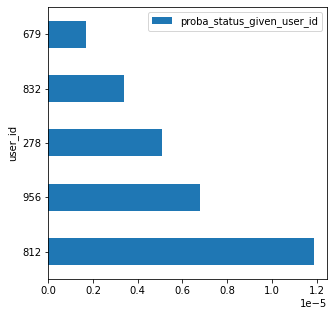

In [53]:
active_students_prob = status_given_user_id[status_given_user_id['is_active']== 1]
active_students_prob.tail(5).plot.barh(x = 'user_id', y='proba_status_given_user_id',figsize=(5, 5))


- User ID 879 only accessed the curriculum once while active in the program and was in the Marco cohort for Java between 1/25/2021 - 7/19/2021
- User ID 832 only accessed the curriculum 3 times while active in the program and was in the Jupiter cohort for Java between 9/21/2020 - 3/30/2021
- User ID 679 only accessed the curriculum 11 times while active in the program and was in the Darden cohort for Data Science between 7/13/2020 - 1/12/2021


<code style="background:skyblue;color:black">4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?</code>

In [54]:
#Let's take a look at lesson counts where it was only accessed once
path_counts = df.groupby(['path'])['user_id'].nunique()
path_counts[path_counts==1]


path
%20https://github.com/RaulCPena     1
'                                   1
,%20https://github.com/RaulCPena    1
.git                                1
.well-known/assetlinks.json         1
                                   ..
web-design/ux/layout/.json          1
web-dev-day-two                     1
where                               1
wp-admin                            1
wp-login                            1
Name: user_id, Length: 609, dtype: int64

In [55]:
#Let's take a look at user ID counts that only accessed the curriculum once
user_id_counts = df.groupby(['user_id'])['path'].nunique()
user_id_counts[user_id_counts==1]

user_id
165    1
177    1
212    1
574    1
593    1
652    1
Name: path, dtype: int64

In [56]:
#Let's take a look at lessons accessed by user ID counts on only one day using one IP address
cohort_id_counts = df.groupby(['user_id'])['date','path','ip'].nunique()
cohort_id_counts[(cohort_id_counts.date == 1) & (cohort_id_counts.path == 1) & (cohort_id_counts.ip == 1) ]

,date,path,ip
user_id,,,
165,1,1,1
177,1,1,1
212,1,1,1
574,1,1,1
593,1,1,1
652,1,1,1


- These user IDs only accessed one lesson on one date using one IP.  Suspicious. 

***

- In looking for suspicious behavior like bot-like behavior that could be accessing multiple pages in one day, we can use the exponential moving average to identify anomalies in normal web traffic.  I will use exponential moving averages to look for anomalies.

####  Exponential Moving Average

<AxesSubplot:>

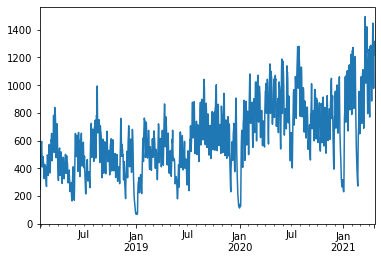

In [57]:
# 7 day EMA
ema_7d = pages.ewm(span = 7).mean()
ema_7d.plot()

<AxesSubplot:>

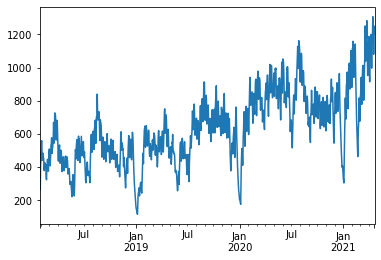

In [58]:
# 14 days EMA
ema_14d = pages.ewm(span = 14).mean()
ema_14d.plot()

In [59]:
# 30 days EMA
ema_30d = pages.ewm(span = 30).mean()

In [60]:
# 90 days EMA
ema_90d = pages.ewm(span = 90).mean()

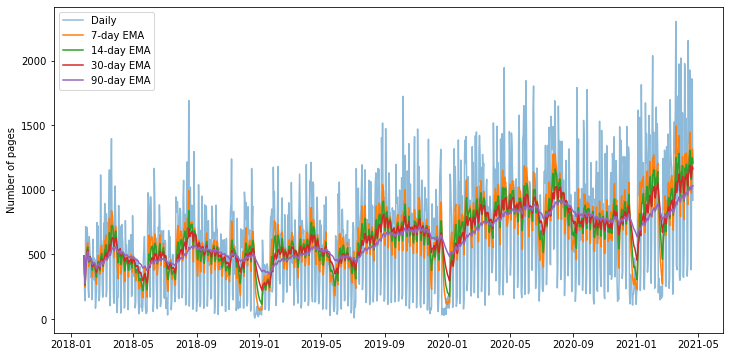

In [61]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(pages.index, pages, label='Daily', alpha=.5)

ax.plot(pages.index, ema_7d, label = '7-day EMA')
ax.plot(pages.index, ema_14d, label = '14-day EMA')
ax.plot(pages.index, ema_30d, label = '30-day EMA')
ax.plot(pages.index, ema_90d, label = '90-day EMA')

ax.legend(loc='best')
ax.set_ylabel('Number of pages')

plt.show()

#### Bollinger Bands

In [62]:
# set the window span
span = 30

# compute midband
midband = pages.ewm(span = 30).mean()
midband.head()

2018-01-26    489.000000
2018-01-27    340.716667
2018-01-28    270.014439
2018-01-29    392.624177
2018-01-30    432.071374
Freq: D, Name: path, dtype: float64

In [63]:
# compute exponential moving stdev
std = pages.ewm(span = 30).std()
std.head()

2018-01-26           NaN
2018-01-27    202.939646
2018-01-28    183.036434
2018-01-29    272.730596
2018-01-30    245.978869
Freq: D, Name: path, dtype: float64

In [64]:
# compute upper and lower bands
ub = midband + std * 3
lb = midband - std * 3
ub.head()

2018-01-26            NaN
2018-01-27     949.535605
2018-01-28     819.123741
2018-01-29    1210.815965
2018-01-30    1170.007980
Freq: D, Name: path, dtype: float64

In [65]:
# concat pages, midband, lb and ub to create a new df 'my_df'

my_df = pd.concat([pages, midband, ub, lb], axis =1)

my_df.columns = ['pages', 'midband', 'ub', 'lb']
my_df.head()

,pages,midband,ub,lb
2018-01-26,489,489.000000,NaN,NaN
2018-01-27,202,340.716667,949.535605,-268.102272
2018-01-28,142,270.014439,819.123741,-279.094863
2018-01-29,715,392.624177,1210.815965,-425.567611
2018-01-30,566,432.071374,1170.007980,-305.865231


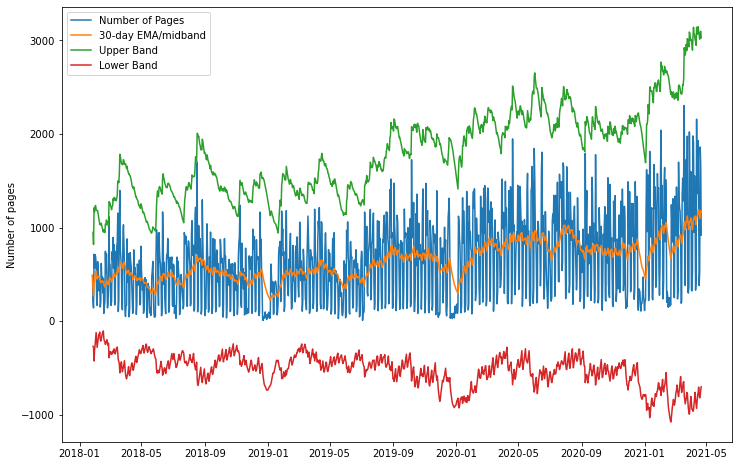

In [66]:
#Plot the bands
fig, ax = plt.subplots(figsize=(12,8))

ax.plot(my_df.index, my_df.pages, label='Number of Pages')

ax.plot(my_df.index, my_df.midband, label = '30-day EMA/midband')
ax.plot(my_df.index, my_df.ub, label = 'Upper Band')
ax.plot(my_df.index, my_df.lb, label = 'Lower Band')

ax.legend(loc='best')
ax.set_ylabel('Number of pages')

plt.show()

In [67]:
#Compute pct_b
my_df['pct_b'] = (my_df['pages'] - my_df['lb'])/ (my_df['ub'] - my_df['lb'])
my_df.head()

,pages,midband,ub,lb,pct_b
2018-01-26,489,489.000000,NaN,NaN,NaN
2018-01-27,202,340.716667,949.535605,-268.102272,0.386077
2018-01-28,142,270.014439,819.123741,-279.094863,0.383434
2018-01-29,715,392.624177,1210.815965,-425.567611,0.697005
2018-01-30,566,432.071374,1170.007980,-305.865231,0.590745


In [68]:
my_df[my_df.pct_b > 1]

,pages,midband,ub,lb,pct_b


In [69]:
def compute_pct_b(pages, span, weight, user):
    midband = pages.ewm(span=span).mean()
    stdev = pages.ewm(span=span).std()
    ub = midband + stdev * weight
    lb = midband - stdev * weight
    bb = pd.concat([ub, lb], axis=1)
    my_df = pd.concat([pages, midband, bb], axis=1)
    my_df.columns = ['pages', 'midband', 'ub', 'lb']
    my_df['pct_b'] = (my_df['pages'] - my_df['lb'])/(my_df['ub'] - my_df['lb'])
    my_df['user_id'] = user
    return my_df


In [70]:
def plt_bands(my_df, user):
    fig, ax = plt.subplots(figsize=(12,8))
    ax.plot(my_df.index, my_df.pages, label='Number of Pages, User: '+str(user))
    ax.plot(my_df.index, my_df.midband, label = 'EMA/midband')
    ax.plot(my_df.index, my_df.ub, label = 'Upper Band')
    ax.plot(my_df.index, my_df.lb, label = 'Lower Band')
    ax.legend(loc='best')
    ax.set_ylabel('Number of Pages')
    plt.show()

In [71]:
def find_anomalies(df, pages, user, span, weight):
    my_df = compute_pct_b(pages, span, weight, user)
    #plt_bands(my_df, user)
    return my_df[my_df.pct_b > 1 ]

In [72]:
span = 30
weight = 2.35

anomalies = pd.DataFrame()
for u in list(df.user_id.unique()):
    user_df = find_anomalies(df, pages, u, span, weight)
    anomalies = pd.concat([anomalies, user_df], axis=0)

In [73]:
anomalies

,pages,midband,ub,lb,pct_b,user_id
2018-02-27,1116,443.671687,1096.219146,-208.875771,1.015157,402
2018-02-27,1116,443.671687,1096.219146,-208.875771,1.015157,313
2018-02-27,1116,443.671687,1096.219146,-208.875771,1.015157,211
2018-02-27,1116,443.671687,1096.219146,-208.875771,1.015157,11
2018-02-27,1116,443.671687,1096.219146,-208.875771,1.015157,64
...,...,...,...,...,...,...
2018-02-27,1116,443.671687,1096.219146,-208.875771,1.015157,964
2018-02-27,1116,443.671687,1096.219146,-208.875771,1.015157,970
2018-02-27,1116,443.671687,1096.219146,-208.875771,1.015157,963
2018-02-27,1116,443.671687,1096.219146,-208.875771,1.015157,961


In [74]:
# look at value counts for pages in anomalies
anomalies.pages.value_counts(sort = False)

1116    899
Name: pages, dtype: int64

In [75]:
anomalies[anomalies.pages == 1156]

,pages,midband,ub,lb,pct_b,user_id


- 911 anomalies found.  Looking at one of the anomalies found below.

In [76]:
df[df.user_id == 956]

,id,name,slack,start_date,end_date,created_at,updated_at,program_id,date,time,path,user_id,cohort_id,ip,program_type,module_1,module_2,is_active
2021-04-15 14:54:10,139.0,Oberon,#oberon,2021-04-12,2021-10-01,2021-04-12 18:07:21,2021-04-12 18:07:21,2.0,2021-04-15,2021-10-21 14:54:10,toc,956,139.0,162.200.114.251,java,toc,NaN,1
2021-04-15 14:55:05,139.0,Oberon,#oberon,2021-04-12,2021-10-01,2021-04-12 18:07:21,2021-04-12 18:07:21,2.0,2021-04-15,2021-10-21 14:55:05,javascript-i/introduction/operators,956,139.0,162.200.114.251,java,javascript-i,introduction,1
2021-04-15 14:56:04,139.0,Oberon,#oberon,2021-04-12,2021-10-01,2021-04-12 18:07:21,2021-04-12 18:07:21,2.0,2021-04-15,2021-10-21 14:56:04,javascript-i/introduction/primitive-types,956,139.0,162.200.114.251,java,javascript-i,introduction,1
2021-04-15 15:32:22,139.0,Oberon,#oberon,2021-04-12,2021-10-01,2021-04-12 18:07:21,2021-04-12 18:07:21,2.0,2021-04-15,2021-10-21 15:32:22,javascript-i/introduction/operators,956,139.0,162.200.114.251,java,javascript-i,introduction,1


<code style="background:skyblue;color:black"> 5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?</code>

In [125]:
df_2019 = df[df['date'].dt.year == 2019]
df_2019.head()

,id,name,slack,start_date,end_date,created_at,updated_at,program_id,date,time,path,user_id,cohort_id,ip,program_type,module_1,module_2,is_active
2019-06-01 17:31:28,1.0,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,2019-06-01,2021-10-21 17:31:28,java-i,402,1.0,71.78.236.131,php,java-i,NaN,0
2019-06-01 17:31:35,1.0,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,2019-06-01,2021-10-21 17:31:35,java-i/syntax-types-and-variables,402,1.0,71.78.236.131,php,java-i,syntax-types-and-variables,0
2019-06-01 17:31:40,1.0,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,2019-06-01,2021-10-21 17:31:40,html-css,402,1.0,71.78.236.131,php,html-css,NaN,0
2019-06-01 17:56:01,1.0,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,2019-06-01,2021-10-21 17:56:01,html-css/elements,402,1.0,71.78.236.131,php,html-css,elements,0
2019-06-01 18:06:35,1.0,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,2019-06-01,2021-10-21 18:06:35,html-css/elements,402,1.0,71.78.236.131,php,html-css,elements,0


In [126]:
df_2019.shape

(204495, 18)

In [156]:
# Daily counts for number of page views

pages = df_2019['path'].resample('d').count()
pages.head()

2019-01-01    35
2019-01-02    82
2019-01-03    96
2019-01-04    90
2019-01-05    31
Freq: D, Name: path, dtype: int64

#### Use Exponential Moving Average to look for change in access to curriculums

<AxesSubplot:>

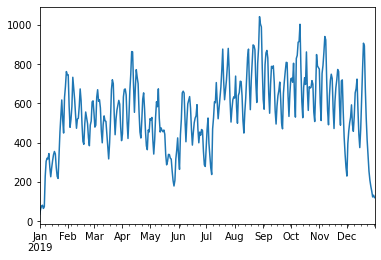

In [157]:
# 7 day EMA
ema_7d = pages.ewm(span = 7).mean()
ema_7d.plot()

<AxesSubplot:>

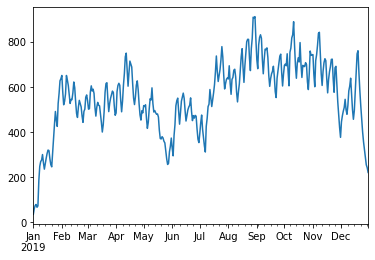

In [158]:
# 14 days EMA
ema_14d = pages.ewm(span = 14).mean()
ema_14d.plot()

In [159]:
# 30 days EMA
ema_30d = pages.ewm(span = 30).mean()

In [160]:
# 90 days EMA
ema_90d = pages.ewm(span = 90).mean()

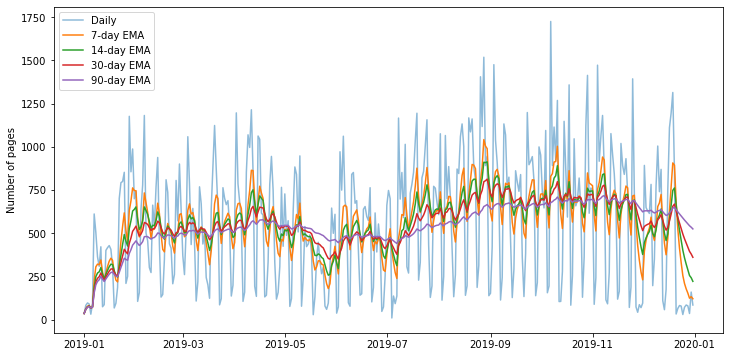

In [161]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(pages.index, pages, label='Daily', alpha=.5)

ax.plot(pages.index, ema_7d, label = '7-day EMA')
ax.plot(pages.index, ema_14d, label = '14-day EMA')
ax.plot(pages.index, ema_30d, label = '30-day EMA')
ax.plot(pages.index, ema_90d, label = '90-day EMA')

ax.legend(loc='best')
ax.set_ylabel('Number of pages')

plt.show()

- It looks like there is a dip in the rolling average around June 2019, indicating that may have been when the access to both curriculums could have been cut off.  It also looks that access or requests dropped in the beggining of 2019.  

<code style="background:skyblue;color:black">6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?</code>


In [77]:
#Let's look at students that are referring to the curriculum after their graduation
students_after_grad = df[(df['date'] > df['end_date']) & (df['name']!= 'Staff')]

students_after_grad

,id,name,slack,start_date,end_date,created_at,updated_at,program_id,date,time,path,user_id,cohort_id,ip,program_type,module_1,module_2,is_active
2019-06-01 17:31:28,1.0,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,2019-06-01,2021-10-21 17:31:28,java-i,402,1.0,71.78.236.131,php,java-i,NaN,0
2019-06-01 17:31:35,1.0,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,2019-06-01,2021-10-21 17:31:35,java-i/syntax-types-and-variables,402,1.0,71.78.236.131,php,java-i,syntax-types-and-variables,0
2019-06-01 17:31:40,1.0,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,2019-06-01,2021-10-21 17:31:40,html-css,402,1.0,71.78.236.131,php,html-css,NaN,0
2019-06-01 17:56:01,1.0,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,2019-06-01,2021-10-21 17:56:01,html-css/elements,402,1.0,71.78.236.131,php,html-css,elements,0
2019-06-01 18:06:35,1.0,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,2019-06-01,2021-10-21 18:06:35,html-css/elements,402,1.0,71.78.236.131,php,html-css,elements,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-20 15:03:45,62.0,Jupiter,#jupiter,2020-09-21,2021-03-30,2020-09-21 18:06:27,2020-09-21 18:06:27,2.0,2021-04-20,2021-10-21 15:03:45,javascript-i,762,62.0,72.177.165.210,java,javascript-i,NaN,0
2021-04-20 15:03:49,62.0,Jupiter,#jupiter,2020-09-21,2021-03-30,2020-09-21 18:06:27,2020-09-21 18:06:27,2.0,2021-04-20,2021-10-21 15:03:49,javascript-i/functions,762,62.0,72.177.165.210,java,javascript-i,functions,0
2021-04-20 17:58:03,62.0,Jupiter,#jupiter,2020-09-21,2021-03-30,2020-09-21 18:06:27,2020-09-21 18:06:27,2.0,2021-04-20,2021-10-21 17:58:03,javascript-ii,762,62.0,72.177.165.210,java,javascript-ii,NaN,0
2021-04-20 17:58:09,62.0,Jupiter,#jupiter,2020-09-21,2021-03-30,2020-09-21 18:06:27,2020-09-21 18:06:27,2.0,2021-04-20,2021-10-21 17:58:09,javascript-ii/es6,762,62.0,72.177.165.210,java,javascript-ii,es6,0


In [78]:
#Lessons most commonly accessed for students who already graduated
students_after_grad.path.value_counts().head(50)
    

javascript-i                                                                 3148
spring                                                                       2859
html-css                                                                     2394
java-i                                                                       2268
java-ii                                                                      2179
java-iii                                                                     2144
javascript-ii                                                                1985
appendix                                                                     1783
mysql                                                                        1684
toc                                                                          1653
jquery                                                                       1547
spring/fundamentals/controllers                                              1296
spring/setup    

In [79]:
#Lessons least commonly accessed for students who already graduated
students_after_grad.path.value_counts().tail(50) 

content/html-css/elements-i/lists.html                   1
student-page                                             1
content/postwork/dashboard.md                            1
2-storytelling/3.3-creating-charts                       1
codeup-exercises                                         1
10.01_Acquire_WebScraping                                1
content/html-css/forms-i/index.html                      1
5-stats/confusion-matrix                                 1
11-nlp/pos-tagging                                       1
4.6.0_DS_Libraries_Overview                              1
quiz                                                     1
6.05_Deliver                                             1
content/appendix/javascript/functions/models.html        1
tc-ml                                                    1
9-timeseries/sarimax                                     1
6.04.07_Ensemble                                         1
7.01_Acquire                                            

<code style="background:skyblue;color:black">7. Which lessons are least accessed?</code>


In [80]:
#Looking only at students for lessons accessed
students = df[df['name']!= 'Staff']

<AxesSubplot:title={'center':'30 Least Commonly Requested Pages'}>

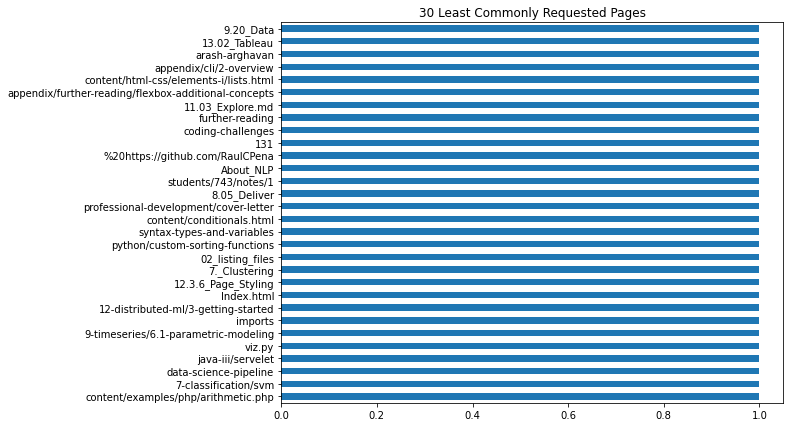

In [81]:
fig, ax = plt.subplots(figsize=(9,7))
students.path.value_counts().tail(30).plot.barh(
    title='30 Least Commonly Requested Pages',
)

In [82]:
students.path.value_counts().tail(50)

javascript-/introducion/working-with-data-types-operators-and-variables    1
students/units/75/sub_units/268                                            1
students/743/notes                                                         1
content/mysql/relationships/indexes.html                                   1
prework/fundamentals/if-statement                                          1
cli-06-moving-files                                                        1
content/examples/php/while.html                                            1
10.04.03_SentimentAnalysis                                                 1
content/appendix/javascript/functions/controllers.html                     1
2.02.02_Sampling                                                           1
3-vocabulary                                                               1
timeline/java-i                                                            1
3-sql                                                                      1

<code style="background:skyblue;color:black"> 8. Anything else I should be aware of?</code>

In [83]:
# get the counts of ips in the dataset

ip_df = pd.DataFrame(df.ip.value_counts(dropna=False)).reset_index().\
                rename(columns={'index': 'ip', 'ip': 'ip_count'})

In [84]:
ip_df.head(20)

,ip,ip_count
0,97.105.19.58,248829
1,97.105.19.61,57563
2,192.171.117.210,8460
3,71.150.217.33,6194
4,12.106.208.194,4028
5,67.11.50.23,3942
6,70.121.183.95,3742
7,76.185.145.231,3435
8,172.124.67.93,3377
9,67.10.174.56,3066


In [85]:
ip_df.tail(20)

,ip,ip_count
4927,174.207.16.237,1
4928,107.77.221.32,1
4929,12.184.218.52,1
4930,107.77.221.69,1
4931,196.52.2.49,1
4932,99.203.27.219,1
4933,99.203.154.146,1
4934,99.203.27.189,1
4935,172.58.67.118,1
4936,172.58.67.186,1


In [86]:
ip_df[ip_df['ip_count'] == 1].nunique()

ip          738
ip_count      1
dtype: int64

- 735 IP addresses have only accessed the curriculum once